# **Inteligência Artificial - IC/UFRJ - 2022/1**
## **Tarefa 4 - Árvore de Decisão - Parte 1**
### Prof. João Carlos Pereira da Silva
#### Roberto Leonie Ferreira Moreira (DRE: 116062192)

Árvore de Decisão

Inicialmente são carregadas as bibliotecas necessárias: 

+ pandas (https://pandas.pydata.org/): biblioteca para análise de dados em python
+ scikit-learn (https://scikit-learn.org/stable/): biblioteca de ferramentas de aprendizagem de máquina em python

In [239]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn

Usaremos como base de dados o arquivo "exemplo_IA.csv" com os dados usados no exemplo da "aula 9 - video 3 - aprendizado de máquina.pdf".

In [240]:
# Nome dos atributos
col_names = ['Outlook','Temperature','Humidity','Wind','PlayTennis']

# carregando a base de dados a ser usada
exemplo = pd.read_csv("exemplo_IA.csv", header=None, names=col_names)

In [241]:
# podemos ver os primeiros elementos do arquivo
exemplo.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [242]:
# definir o conceito alvo e as features usadas

feature_cols = ['Outlook','Temperature','Humidity','Wind'] # features (atributos) que serão usadas no aprendizado

X = exemplo[feature_cols] # selecionamos as colunas correspondentes aos atributos que serão usados
y = exemplo.PlayTennis # conceito que queremos aprender. Selecionamos a coluna com a classificação das instâncias

### **Exercício 1**

Podemos dividir o conjunto de exemplos dado em conjuntos de **treinamento** e **teste** usando `sklearn.model_selection.train_test_split`.

Dividiremos, portanto, o conjunto de exemplos em treinamento e teste das seguintes formas:



1.   60% treinamento e 40% teste
2.   80% treinamento e 20% teste.

Para que seja possível esta divisão, importaremos as bibliotecas necessárias na célula abaixo.




In [243]:
import numpy as np
from sklearn.model_selection import train_test_split

Os dados do nosso exemplo são categóricos e o classificador de árvore de decisão do scikit não funciona para este tipo de dado. Precisamos preparar os dados antes construir nosso classificador. Para isso vamos usar a função do pandas "pd.get_dummies" que converte os atributos categóricos em atributos com valores 0 e 1.
Por exemplo, o atributo Humidity que pode receber os valores High e Normal, passa a ser representado pelos atributos Humidity_High e Humidity_Normal, que podem receber os valores 0 e 1.

In [244]:
Xone_hot_data = pd.get_dummies(X[['Outlook','Temperature','Humidity','Wind']]) #transformando o dataset

# Para 60% de treinamento e 40% teste, temos:
# X_train, X_test, y_train, y_test = train_test_split(Xone_hot_data, y, test_size=0.40, train_size=0.60)

# Para 80% de treinamento e 20% teste, temos:
X_train, X_test, y_train, y_test = train_test_split(Xone_hot_data, y, test_size=0.20, train_size=0.80)

Agora, a partir da divisão do conjunto de exemplos, será gerada a **árvore de decisão** correspondente. Além disso, os valores de **acurácia** obtidos no treinamento e teste serão indicados.

In [245]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Podemos visualizar a árvore de decisão gerada usando o pacote graphviz:
https://graphviz.org/
https://pypi.org/project/graphviz/

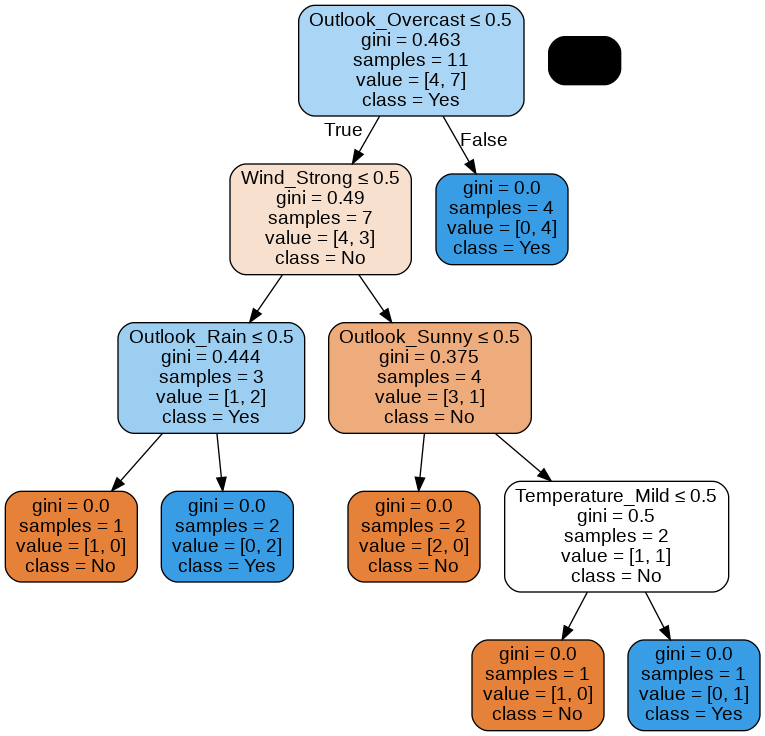

In [246]:
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = one_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o one-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

Medindo a acurácia usando divisão **60-40 e 80-20 para treinamento e teste**, temos:

In [247]:
# Usando modelo para classificar os dados que temos a disposição
y_pred = clf.predict(X_train)

# Medida de acuracia, que indica quantas instâncias são corretamente classificadas
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0
